In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tkinter import Tk, filedialog
from sklearn.linear_model import LinearRegression

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Grade to point conversion (5.0 scale)
grade_points = {
    'A': 5.0,
    'B': 4.0,
    'C': 3.0,
    'D': 2.0,
    'E': 1.0,
    'F': 0.0
}

print("Grade Point Scale:")
for grade, points in grade_points.items():
    print(f"{grade} = {points}")

Grade Point Scale:
A = 5.0
B = 4.0
C = 3.0
D = 2.0
E = 1.0
F = 0.0


In [3]:
def grade_to_points(grade):
    """
    Convert a letter grade to grade points.
    
    This function takes a letter grade (like 'A', 'B', 'C') and returns
    the corresponding numerical grade points on a 5.0 scale.
    
    Args:
        grade (str): Letter grade (A, B, C, D, E, F)
    
    Returns:
        float: Grade points (0.0 - 5.0)
    """
    
    # Clean up the input grade
    # .upper() converts lowercase to uppercase: 'a' becomes 'A'
    # .strip() removes any extra spaces: ' A ' becomes 'A'
    # This makes our function flexible - it accepts 'a', 'A', ' A ' all the same
    grade = grade.upper().strip()
    
    # Check if the grade exists in our grade_points dictionary
    # 'in' checks if a key exists in the dictionary
    if grade in grade_points:
        # If the grade is valid (found in dictionary), return its point value
        # Example: if grade is 'A', this returns 5.0
        return grade_points[grade]
    else:
        # If the grade is NOT valid (not in dictionary), print a warning
        # Example: if someone enters 'Z' or '100', this warning appears
        print(f"Warning: Invalid grade '{grade}'. Returning 0.0")
        
        # Return 0.0 as a safe default for invalid grades
        # This prevents the program from crashing
        return 0.0


# === TESTING SECTION ===
# Let's test our function to make sure it works correctly

print("Testing grade conversion:")

# Test 1: Valid grade 'A' should return 5.0
print(f"Grade A = {grade_to_points('A')} points")

# Test 2: Valid grade 'C' should return 3.0
print(f"Grade C = {grade_to_points('C')} points")

# Test 3: Valid grade 'F' should return 0.0
print(f"Grade F = {grade_to_points('F')} points")

Testing grade conversion:
Grade A = 5.0 points
Grade C = 3.0 points
Grade F = 0.0 points


In [4]:
def calculate_gpa(courses, grades, units):
    """
    Calculate GPA for a semester.
    
    Args:
        courses (list): List of course names
        grades (list): List of grades for each course
        units (list): List of credit units for each course
    
    Returns:
        float: Calculated GPA
    """
    
    # Initialize variables to store our running totals
    total_points = 0  # This will hold the sum of all weighted points
    total_units = 0   # This will hold the sum of all credit units
    
    # Print a header for our calculation table
    print("\n--- GPA Calculation ---")
    
    # Print column headers with specific widths for alignment
    # <20 means left-align with 20 character width
    print(f"{'Course':<20} {'Grade':<10} {'Units':<10} {'Points':<10}")
    
    # Print a line of dashes to separate header from data
    print("-" * 50)
    
    # Loop through each course (using index i)
    # range(len(courses)) gives us 0, 1, 2, 3... up to number of courses
    for i in range(len(courses)):
        # Get the course name at position i
        course = courses[i]
        
        # Get the grade at position i
        grade = grades[i]
        
        # Get the credit units at position i
        unit = units[i]
        
        # Convert the letter grade to points using our grade_to_points function
        points = grade_to_points(grade)
        
        # Calculate weighted points (grade points × credit units)
        # Example: If grade is A (5.0) and units is 3, weighted_points = 15.0
        weighted_points = points * unit
        
        # Add this course's weighted points to our running total
        total_points += weighted_points
        
        # Add this course's units to our running total
        total_units += unit
        
        # Print the details for this course
        # .2f means format as decimal with 2 places after the point
        print(f"{course:<20} {grade:<10} {unit:<10} {weighted_points:<10.2f}")
    
    # Safety check: if no units were taken, return 0 to avoid division by zero
    if total_units == 0:
        return 0.0
    
    # Calculate final GPA: total points divided by total units
    # This is the weighted average formula
    gpa = total_points / total_units
    
    # Print a separator line
    print("-" * 50)
    
    # Print the summary of our calculation
    print(f"Total Points: {total_points:.2f}")
    print(f"Total Units: {total_units}")
    print(f"GPA: {gpa:.2f}")
    
    # Return the calculated GPA so we can use it elsewhere
    return gpa

In [5]:
# Sample data for one semester
courses = ["Introduction to Computing", "Calculus I", "English", "Physics"]
grades = ["A", "B", "C", "A"]
units = [3, 4, 2, 3]

# Calculate GPA
semester_gpa = calculate_gpa(courses, grades, units)

print(f"\n✅ Semester GPA: {semester_gpa:.2f}")


--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English              C          2          6.00      
Physics              A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA: 4.33

✅ Semester GPA: 4.33


In [6]:
def calculate_cgpa(semesters_data):
    """
    Calculate Cumulative GPA across multiple semesters.
    
    Args:
        semesters_data (list): List of dictionaries, each containing:
                               - 'semester': semester number/name
                               - 'courses': list of course names
                               - 'grades': list of grades
                               - 'units': list of credit units
    
    Returns:
        dict: Contains CGPA and list of semester GPAs
    """
    
    # Initialize variables to track cumulative totals across ALL semesters
    cumulative_points = 0  # Total weighted points from all semesters
    cumulative_units = 0   # Total credit units from all semesters
    
    # Create an empty list to store each semester's GPA
    # We'll use this later for visualization
    semester_gpas = []
    
    # Print header for our CGPA calculation report
    print("\n" + "="*60)
    print("CUMULATIVE GPA (CGPA) CALCULATION")
    print("="*60)
    
    # Loop through each semester in our data
    # enumerate() gives us both the index (i) and the data (semester)
    for i, semester in enumerate(semesters_data):
        # Extract semester information from the dictionary
        semester_name = semester['semester']  # e.g., "Semester 1"
        courses = semester['courses']         # List of course names
        grades = semester['grades']           # List of grades for those courses
        units = semester['units']             # List of credit units
        
        # Print which semester we're calculating
        print(f"\n📚 {semester_name}")
        print("-" * 60)
        
        # Calculate GPA for this specific semester
        # This uses our calculate_gpa function from Cell 4
        semester_gpa = calculate_gpa(courses, grades, units)
        
        # Calculate total points earned in this semester
        # We need to recalculate this to add to our cumulative total
        semester_points = 0  # Initialize points for this semester
        semester_units = 0   # Initialize units for this semester
        
        # Loop through each course in this semester
        for j in range(len(courses)):
            # Get the grade points for this course's grade
            points = grade_to_points(grades[j])
            
            # Calculate weighted points (points × units)
            weighted_points = points * units[j]
            
            # Add to semester totals
            semester_points += weighted_points
            semester_units += units[j]
        
        # Add this semester's totals to our cumulative totals
        cumulative_points += semester_points
        cumulative_units += semester_units
        
        # Add this semester's GPA to our list
        # We store it as a dictionary with semester name and GPA value
        semester_gpas.append({
            'semester': semester_name,
            'gpa': semester_gpa
        })
        
        # Print semester summary
        print(f"\n✓ {semester_name} GPA: {semester_gpa:.2f}")
        print(f"  Semester Points: {semester_points:.2f}")
        print(f"  Semester Units: {semester_units}")
    
    # Calculate final CGPA by dividing cumulative points by cumulative units
    # Safety check: if no units, return 0 to avoid division by zero
    if cumulative_units == 0:
        cgpa = 0.0
    else:
        cgpa = cumulative_points / cumulative_units
    
    # Print final CGPA summary
    print("\n" + "="*60)
    print("FINAL CUMULATIVE RESULTS")
    print("="*60)
    print(f"Total Points Earned: {cumulative_points:.2f}")
    print(f"Total Units Completed: {cumulative_units}")
    print(f"🎓 CUMULATIVE GPA (CGPA): {cgpa:.2f}")
    print("="*60)
    
    # Return a dictionary containing both CGPA and semester-by-semester GPAs
    # This allows us to use this data for visualization later
    return {
        'cgpa': cgpa,
        'semester_gpas': semester_gpas,
        'total_points': cumulative_points,
        'total_units': cumulative_units
    }

In [7]:
# Create sample data for 3 semesters
# Each semester is a dictionary containing all its course information
semesters_data = [
    {
        'semester': 'Semester 1',
        'courses': ['Introduction to Computing', 'Calculus I', 'English', 'Physics'],
        'grades': ['A', 'B', 'C', 'A'],
        'units': [3, 4, 2, 3]
    },
    {
        'semester': 'Semester 2',
        'courses': ['Data Structures', 'Calculus II', 'Chemistry', 'Philosophy'],
        'grades': ['B', 'A', 'B', 'C'],
        'units': [3, 4, 3, 2]
    },
    {
        'semester': 'Semester 3',
        'courses': ['Algorithms', 'Linear Algebra', 'Physics II', 'Technical Writing'],
        'grades': ['A', 'A', 'B', 'A'],
        'units': [4, 3, 3, 2]
    },
    {
        'semester': 'Semester 4',
        'courses': ['Database Systems', 'Web Development'],
        'grades': ['A', 'A'],
        'units': [3, 3]
    }
]

# Calculate CGPA using our function
# Store the result in a variable so we can use it later
result = calculate_cgpa(semesters_data)

# Access the CGPA from the result dictionary
print(f"\n🎯 Your CGPA after {len(result['semester_gpas'])} semesters: {result['cgpa']:.2f}")
#                              ↑
#                    Counts actual semesters dynamically!


CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English              C          2          6.00      
Physics              A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA: 4.33

✓ Semester 1 GPA: 4.33
  Semester Points: 52.00
  Semester Units: 12

📚 Semester 2
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Data Structures      B          3          12.00     
Calculus II          A          4          20.00     
Chemistry            B          3          12.00     
Philo

In [8]:
def load_grades_from_csv(filepath):
    """
    Load student grades from a CSV file.
    
    Expected CSV format:
    Semester, Course, Units, Grade
    1, Introduction to Computing, 3, A
    1, Calculus I, 4, B
    2, Data Structures, 3, A
    ...
    
    Args:
        filepath (str): Path to the CSV file
    
    Returns:
        list: Semesters data in the format needed for calculate_cgpa()
    """
    
    # Check if file exists before trying to load it
    # This prevents errors if user provides wrong path
    if not os.path.exists(filepath):
        print(f"❌ Error: File '{filepath}' not found!")
        print("   Please check the file path and try again.")
        return None
    
    # Try to load the CSV file using pandas
    # We use try-except to handle any errors gracefully
    try:
        # Read the CSV file into a pandas DataFrame
        # DataFrame is like a table in Excel
        df = pd.read_csv(filepath)
        
        print(f"✅ File loaded successfully!")
        print(f"   Total records: {len(df)}")
        print(f"\n📋 First few rows:")
        print(df.head())  # Show first 5 rows to user
        
    except Exception as e:
        # If anything goes wrong (corrupted file, wrong format, etc.)
        print(f"❌ Error loading file: {e}")
        return None
    
    # Validate that required columns exist
    # We need these specific column names in the CSV
    required_columns = ['Semester', 'Course', 'Units', 'Grade']
    
    # Check each required column
    for col in required_columns:
        if col not in df.columns:
            print(f"❌ Error: Missing required column '{col}'")
            print(f"   Your CSV must have these columns: {required_columns}")
            print(f"   Your CSV has: {list(df.columns)}")
            return None
    
    # Clean the data
    # Remove any rows where important data is missing (NaN = Not a Number)
    original_count = len(df)
    df = df.dropna(subset=['Course', 'Grade', 'Units'])
    
    # Tell user if we removed any rows
    if len(df) < original_count:
        removed = original_count - len(df)
        print(f"⚠️  Removed {removed} incomplete records")
    
    # Convert Units to integers (sometimes they're read as floats)
    # .astype(int) converts the data type
    df['Units'] = df['Units'].astype(int)
    
    # Clean up Grade column (remove extra spaces, make uppercase)
    df['Grade'] = df['Grade'].str.strip().str.upper()
    
    # Group data by semester
    # This organizes all courses from same semester together
    semesters_data = []
    
    # Get unique semester values and sort them
    # unique() gives us each semester number once
    # sorted() puts them in order: 1, 2, 3...
    unique_semesters = sorted(df['Semester'].unique())
    
    # Loop through each semester
    for semester_num in unique_semesters:
        # Filter DataFrame to get only rows for this semester
        # df[condition] keeps only rows where condition is True
        semester_df = df[df['Semester'] == semester_num]
        
        # Extract data for this semester into lists
        # .tolist() converts DataFrame column to Python list
        courses = semester_df['Course'].tolist()
        grades = semester_df['Grade'].tolist()
        units = semester_df['Units'].tolist()
        
        # Create dictionary for this semester
        # This matches the format our calculate_cgpa() function expects
        semester_dict = {
            'semester': f'Semester {semester_num}',
            'courses': courses,
            'grades': grades,
            'units': units
        }
        
        # Add this semester to our list
        semesters_data.append(semester_dict)
    
    # Print summary
    print(f"\n✅ Data organized into {len(semesters_data)} semesters")
    
    return semesters_data

In [9]:
# Create a sample CSV file for testing
# This simulates what a student's grade file might look like

sample_data = """Semester,Course,Units,Grade
1,Introduction to Computing,3,A
1,Calculus I,4,B
1,English Composition,2,C
1,General Physics,3,A
2,Data Structures,3,B
2,Calculus II,4,A
2,Chemistry,3,B
2,Philosophy,2,C
3,Algorithms,4,A
3,Linear Algebra,3,A
3,Physics II,3,B
3,Technical Writing,2,A"""

# Write this data to a file
# 'w' means write mode (creates new file or overwrites existing)
with open('sample_grades.csv', 'w') as f:
    f.write(sample_data)

print("✅ Sample CSV file created: 'sample_grades.csv'")
print("\n📄 File contents:")
print(sample_data)

✅ Sample CSV file created: 'sample_grades.csv'

📄 File contents:
Semester,Course,Units,Grade
1,Introduction to Computing,3,A
1,Calculus I,4,B
1,English Composition,2,C
1,General Physics,3,A
2,Data Structures,3,B
2,Calculus II,4,A
2,Chemistry,3,B
2,Philosophy,2,C
3,Algorithms,4,A
3,Linear Algebra,3,A
3,Physics II,3,B
3,Technical Writing,2,A


In [10]:
# Test loading the CSV file we just created

print("🔄 Loading grades from CSV...")
print("="*60)

# Load the data from our sample CSV file
# This returns the semesters_data list we need
loaded_data = load_grades_from_csv('sample_grades.csv')

# Check if loading was successful
if loaded_data:
    print("\n" + "="*60)
    print("📊 CALCULATING CGPA FROM CSV DATA")
    print("="*60)
    
    # Now use our existing calculate_cgpa function
    # This shows how CSV loading integrates with our existing code
    result = calculate_cgpa(loaded_data)
    
    print(f"\n🎓 Final CGPA from CSV file: {result['cgpa']:.2f}")
else:
    print("\n❌ Failed to load data. Please check the file.")

🔄 Loading grades from CSV...
✅ File loaded successfully!
   Total records: 12

📋 First few rows:
   Semester                     Course  Units Grade
0         1  Introduction to Computing      3     A
1         1                 Calculus I      4     B
2         1        English Composition      2     C
3         1            General Physics      3     A
4         2            Data Structures      3     B

✅ Data organized into 3 semesters

📊 CALCULATING CGPA FROM CSV DATA

CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English Composition  C          2          6.00      
General Physics      A          3          15.00     
--------------------------------------------------
Total Poin

In [11]:
def browse_and_load_csv():
    """
    Open a file browser dialog for students to select their CSV file.
    
    This function creates a pop-up window (like when you click "Open File" 
    in any program) where students can navigate their computer and select 
    their grades CSV file with a simple click.
    
    Returns:
        list: Semesters data ready for CGPA calculation, or None if cancelled
    """
    
    # Create a Tkinter root window
    # Tkinter is Python's built-in GUI (Graphical User Interface) library
    root = Tk()
    
    # Hide the main window - we only want the file dialog to show
    # Without this, an empty window would appear behind the dialog
    root.withdraw()
    
    # Make the dialog appear on top of other windows
    # This ensures students see it immediately
    root.attributes('-topmost', True)
    
    # Print instructions to the console
    print("📂 Opening file browser...")
    print("   Please select your grades CSV file from the dialog window")
    print("   (A pop-up window should appear - if not, check behind other windows)")
    
    # Open the file selection dialog
    # This is the actual "Browse" window that pops up
    filepath = filedialog.askopenfilename(
        title="Select Your Grades CSV File",  # Title shown in dialog window
        filetypes=[
            ("CSV Files", "*.csv"),           # Show CSV files by default
            ("All Files", "*.*")              # Option to show all files
        ],
        initialdir=os.getcwd()  # Start browsing in current directory (where notebook is)
    )
    
    # Close and destroy the Tkinter window
    # Clean up - we're done with the GUI
    root.destroy()
    
    # Check if user selected a file or clicked "Cancel"
    # If cancelled, filepath will be an empty string ''
    if not filepath:
        print("\n❌ No file selected. Operation cancelled.")
        print("   💡 Tip: Run this cell again to try selecting a file")
        return None
    
    # Show user which file they selected
    # os.path.basename() gets just the filename without the full path
    print(f"\n✅ File selected: {os.path.basename(filepath)}")
    print(f"   Location: {filepath}")
    
    # Now load the selected CSV file using our existing function
    # This validates and processes the file
    print("\n🔄 Loading and validating file...")
    return load_grades_from_csv(filepath)

In [12]:
def simple_validate_csv(df):
    """
    Basic validation for CSV data.
    
    Checks the essentials:
    - Required columns exist
    - Grades are valid letters
    - Units are positive numbers
    
    Args:
        df (DataFrame): Loaded CSV data
    
    Returns:
        bool: True if data looks good, False if there are problems
    """
    
    print("🔍 Checking your data...")
    print("-" * 50)
    
    # Check 1: Do we have the right columns?
    required = ['Semester', 'Course', 'Units', 'Grade']
    
    for col in required:
        if col not in df.columns:
            print(f"❌ Missing column: {col}")
            print(f"   Your CSV needs: Semester, Course, Units, Grade")
            return False
    
    print("✅ All columns found")
    
    # Check 2: Are grades valid?
    valid_grades = ['A', 'B', 'C', 'D', 'E', 'F']
    
    # Clean up grades (uppercase, remove spaces)
    df['Grade'] = df['Grade'].str.upper().str.strip()
    
    # Find any invalid grades
    for idx, grade in df['Grade'].items():
        if grade not in valid_grades:
            print(f"❌ Invalid grade '{grade}' in row {idx + 2}")
            print(f"   Valid grades are: A, B, C, D, E, F")
            return False
    
    print("✅ All grades are valid")
    
    # Check 3: Are units positive numbers?
    try:
        # Convert to numbers
        df['Units'] = pd.to_numeric(df['Units'])
        
        # Check if any are negative or zero
        if (df['Units'] <= 0).any():
            print("❌ Units must be positive numbers")
            return False
        
        print("✅ Units look good")
        
    except:
        print("❌ Units must be numbers (like 3, 4, 5)")
        return False
    
    # If we got here, everything passed!
    print("-" * 50)
    print("✅ Data validation passed!")
    print()
    
    return True

In [13]:
def load_csv_simple(filepath):
    """
    Load CSV file with basic validation.
    
    Args:
        filepath (str): Path to CSV file
    
    Returns:
        list: Semester data, or None if there's a problem
    """
    
    # Check file exists
    if not os.path.exists(filepath):
        print(f"❌ Can't find file: {filepath}")
        return None
    
    # Try to load it
    try:
        df = pd.read_csv(filepath)
        print(f"📂 Loaded {len(df)} courses")
    except:
        print("❌ Couldn't read the CSV file")
        print("   Make sure it's a proper CSV format")
        return None
    
    # Validate the data
    if not simple_validate_csv(df):
        print("\n💡 Fix the errors above and try again")
        return None
    
    # Clean up any missing data
    df = df.dropna()
    
    # Organize by semester
    semesters_data = []
    
    for sem_num in sorted(df['Semester'].unique()):
        sem_df = df[df['Semester'] == sem_num]
        
        semesters_data.append({
            'semester': f'Semester {int(sem_num)}',
            'courses': sem_df['Course'].tolist(),
            'grades': sem_df['Grade'].tolist(),
            'units': sem_df['Units'].astype(int).tolist()
        })
    
    print(f"✅ Organized into {len(semesters_data)} semesters\n")
    return semesters_data

In [14]:
"""
📚 UPLOAD YOUR GRADES

Requirements:
- CSV file with columns: Semester, Course, Units, Grade
- Grades must be: A, B, C, D, E, or F
- Units must be positive numbers

Run this cell to upload your file!
"""

print("🎓 GPA CALCULATOR")
print("="*60)

# Open file browser
root = Tk()
root.withdraw()
root.attributes('-topmost', True)

filepath = filedialog.askopenfilename(
    title="Select Your Grades CSV",
    filetypes=[("CSV Files", "*.csv")],
    initialdir=os.getcwd()
)

root.destroy()

if not filepath:
    print("❌ No file selected")
else:
    print(f"📂 Selected: {os.path.basename(filepath)}\n")
    
    # Load the file
    loaded_data = load_csv_simple(filepath)
    
    if loaded_data:
        # Calculate CGPA
        print("="*60)
        result = calculate_cgpa(loaded_data)
        
        # Show results
        print("\n" + "="*60)
        print(f"🎓 YOUR CGPA: {result['cgpa']:.2f}")
        print(f"📚 Semesters: {len(result['semester_gpas'])}")
        print("="*60)
        
        print("\n📊 By Semester:")
        for sem in result['semester_gpas']:
            print(f"   {sem['semester']}: {sem['gpa']:.2f}")

🎓 GPA CALCULATOR
📂 Selected: sample_grades.csv

📂 Loaded 12 courses
🔍 Checking your data...
--------------------------------------------------
✅ All columns found
✅ All grades are valid
✅ Units look good
--------------------------------------------------
✅ Data validation passed!

✅ Organized into 3 semesters


CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English Composition  C          2          6.00      
General Physics      A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA: 4.33

✓ Semester 1 GPA: 4.33
  Semester Points: 52.00
  Semester Units: 12

📚 Semester 2
----------------------------------------------

In [15]:
def plot_gpa_trend(result):
    """
    Create a line chart showing GPA trend across semesters.
    
    This visualization helps students see if their performance is
    improving, declining, or staying steady over time.
    
    Args:
        result (dict): Result from calculate_cgpa() function
                      Contains 'semester_gpas' and 'cgpa'
    """
    
    # Extract semester data from result
    # semester_gpas is a list of dictionaries: [{'semester': 'Semester 1', 'gpa': 4.2}, ...]
    semester_gpas = result['semester_gpas']
    
    # Create lists for plotting
    # We need separate lists for x-axis (semester names) and y-axis (GPA values)
    semesters = []  # Will hold: ['Semester 1', 'Semester 2', ...]
    gpas = []       # Will hold: [4.2, 3.9, 4.5, ...]
    
    # Extract semester names and GPA values
    for item in semester_gpas:
        semesters.append(item['semester'])
        gpas.append(item['gpa'])
    
    # Get the CGPA for the chart
    cgpa = result['cgpa']
    
    # Create the plot
    # figsize=(10, 6) means 10 inches wide, 6 inches tall
    plt.figure(figsize=(10, 6))
    
    # Plot the line chart
    # 'o-' means: 'o' = circles at data points, '-' = line connecting them
    # linewidth=2 makes the line thicker (easier to see)
    # markersize=8 makes the circle markers bigger
    # color='#2E86AB' is a nice blue color (you can change this!)
    plt.plot(semesters, gpas, 'o-', linewidth=2, markersize=8, color='#2E86AB', label='Semester GPA')
    
    # Add a horizontal line showing CGPA
    # This helps students see if each semester is above/below their cumulative average
    # '--' means dashed line
    # alpha=0.7 means slightly transparent (70% visible)
    plt.axhline(y=cgpa, color='#A23B72', linestyle='--', linewidth=2, alpha=0.7, label=f'CGPA: {cgpa:.2f}')
    
    # Add labels and title
    plt.xlabel('Semester', fontsize=12, fontweight='bold')
    plt.ylabel('GPA', fontsize=12, fontweight='bold')
    plt.title('📈 GPA Trend Across Semesters', fontsize=14, fontweight='bold', pad=20)
    
    # Set Y-axis limits
    # We want to show 0.0 to 5.0 (full GPA scale)
    plt.ylim(0, 5.5)
    
    # Add grid for easier reading
    # alpha=0.3 means very light grid lines (don't distract from data)
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add legend (explains what the lines mean)
    # 'upper left' positions the legend in top-left corner
    plt.legend(loc='upper left', fontsize=10)
    
    # Rotate x-axis labels if there are many semesters
    # This prevents labels from overlapping
    if len(semesters) > 4:
        plt.xticks(rotation=45, ha='right')
    
    # Add value labels on each point
    # This shows the exact GPA number on the chart
    for i, (sem, gpa) in enumerate(zip(semesters, gpas)):
        # Place text slightly above each point
        # xytext=(0, 5) means: 0 pixels right, 5 pixels up from point
        plt.annotate(f'{gpa:.2f}', 
                    xy=(i, gpa),           # Position of the point
                    xytext=(0, 5),         # Offset for the text
                    textcoords='offset points',
                    ha='center',           # Horizontally center the text
                    fontsize=9,
                    fontweight='bold')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    print("✅ GPA trend chart displayed above!")

In [16]:
def plot_semester_comparison(result):
    """
    Create a bar chart comparing GPA across all semesters.
    
    This makes it easy to see which semesters were strongest/weakest.
    
    Args:
        result (dict): Result from calculate_cgpa() function
    """
    
    # Extract data
    semester_gpas = result['semester_gpas']
    cgpa = result['cgpa']
    
    # Prepare data for plotting
    semesters = []
    gpas = []
    
    for item in semester_gpas:
        semesters.append(item['semester'])
        gpas.append(item['gpa'])
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Create color list for bars
    # Bars above CGPA will be green, below CGPA will be orange
    colors = []
    for gpa in gpas:
        if gpa >= cgpa:
            colors.append('#06A77D')  # Green for above average
        else:
            colors.append('#F58A07')  # Orange for below average
    
    # Create bar chart
    # bars variable stores the bar objects so we can customize them later
    bars = plt.bar(semesters, gpas, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    
    # Add CGPA reference line
    plt.axhline(y=cgpa, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'CGPA: {cgpa:.2f}')
    
    # Labels and title
    plt.xlabel('Semester', fontsize=12, fontweight='bold')
    plt.ylabel('GPA', fontsize=12, fontweight='bold')
    plt.title('📊 Semester GPA Comparison', fontsize=14, fontweight='bold', pad=20)
    
    # Set Y-axis limits
    plt.ylim(0, 5.5)
    
    # Add grid
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add value labels on top of each bar
    for i, (bar, gpa) in enumerate(zip(bars, gpas)):
        # Get the height of the bar
        height = bar.get_height()
        
        # Place text on top of bar
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{gpa:.2f}',
                ha='center', va='bottom',
                fontsize=10, fontweight='bold')
    
    # Rotate x-axis labels if needed
    if len(semesters) > 4:
        plt.xticks(rotation=45, ha='right')
    
    # Add legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Display
    plt.show()
    
    print("✅ Semester comparison chart displayed above!")

In [17]:
def create_dashboard(result):
    """
    Create a comprehensive dashboard with multiple visualizations.
    
    This combines multiple charts into one view for better insights.
    
    Args:
        result (dict): Result from calculate_cgpa() function
    """
    
    print("📊 GENERATING VISUAL DASHBOARD...")
    print("="*70 + "\n")
    
    # Extract data
    semester_gpas = result['semester_gpas']
    cgpa = result['cgpa']
    
    semesters = [item['semester'] for item in semester_gpas]
    gpas = [item['gpa'] for item in semester_gpas]
    
    # Create figure with 2 subplots (side by side)
    # 1 row, 2 columns
    # figsize=(15, 5) makes it wide enough for both charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # === SUBPLOT 1: Line Chart (Trend) ===
    ax1.plot(semesters, gpas, 'o-', linewidth=2, markersize=8, color='#2E86AB')
    ax1.axhline(y=cgpa, color='#A23B72', linestyle='--', linewidth=2, alpha=0.7, label=f'CGPA: {cgpa:.2f}')
    
    # Add labels
    ax1.set_xlabel('Semester', fontsize=11, fontweight='bold')
    ax1.set_ylabel('GPA', fontsize=11, fontweight='bold')
    ax1.set_title('📈 GPA Trend', fontsize=12, fontweight='bold')
    ax1.set_ylim(0, 5.5)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.legend(loc='upper left')
    
    # Add value labels
    for i, gpa in enumerate(gpas):
        ax1.annotate(f'{gpa:.2f}', xy=(i, gpa), xytext=(0, 5),
                    textcoords='offset points', ha='center', fontsize=9, fontweight='bold')
    
    # Rotate labels if needed
    if len(semesters) > 4:
        ax1.set_xticklabels(semesters, rotation=45, ha='right')
    
    # === SUBPLOT 2: Bar Chart (Comparison) ===
    colors = ['#06A77D' if gpa >= cgpa else '#F58A07' for gpa in gpas]
    bars = ax2.bar(semesters, gpas, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax2.axhline(y=cgpa, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'CGPA: {cgpa:.2f}')
    
    # Add labels
    ax2.set_xlabel('Semester', fontsize=11, fontweight='bold')
    ax2.set_ylabel('GPA', fontsize=11, fontweight='bold')
    ax2.set_title('📊 Semester Comparison', fontsize=12, fontweight='bold')
    ax2.set_ylim(0, 5.5)
    ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
    ax2.legend(loc='upper left')
    
    # Add value labels on bars
    for bar, gpa in zip(bars, gpas):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{gpa:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Rotate labels if needed
    if len(semesters) > 4:
        ax2.set_xticklabels(semesters, rotation=45, ha='right')
    
    # Add overall title for the dashboard
    fig.suptitle(f'🎓 Academic Performance Dashboard | CGPA: {cgpa:.2f}', 
                fontsize=14, fontweight='bold', y=1.02)
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Display
    plt.show()
    
    # Print insights
    print("\n" + "="*70)
    print("📈 PERFORMANCE INSIGHTS")
    print("="*70)
    
    # Calculate statistics
    best_semester_idx = gpas.index(max(gpas))
    worst_semester_idx = gpas.index(min(gpas))
    avg_gpa = sum(gpas) / len(gpas)
    
    print(f"\n🏆 Best Semester:  {semesters[best_semester_idx]} (GPA: {gpas[best_semester_idx]:.2f})")
    print(f"📉 Lowest Semester: {semesters[worst_semester_idx]} (GPA: {gpas[worst_semester_idx]:.2f})")
    print(f"📊 Average GPA:    {avg_gpa:.2f}")
    print(f"🎯 Current CGPA:   {cgpa:.2f}")
    
    # Trend analysis
    if len(gpas) >= 2:
        if gpas[-1] > gpas[-2]:
            print(f"\n✅ Positive Trend: Your GPA improved in the latest semester!")
        elif gpas[-1] < gpas[-2]:
            print(f"\n⚠️  Declining Trend: Your GPA dropped in the latest semester.")
        else:
            print(f"\n➡️  Stable Performance: Your GPA remained steady.")
    
    print("="*70)

🎨 CREATING VISUALIZATIONS...

📂 Loaded 12 courses
🔍 Checking your data...
--------------------------------------------------
✅ All columns found
✅ All grades are valid
✅ Units look good
--------------------------------------------------
✅ Data validation passed!

✅ Organized into 3 semesters


CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English Composition  C          2          6.00      
General Physics      A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA: 4.33

✓ Semester 1 GPA: 4.33
  Semester Points: 52.00
  Semester Units: 12

📚 Semester 2
------------------------------------------------------------

--

C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3579931015.py:83: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


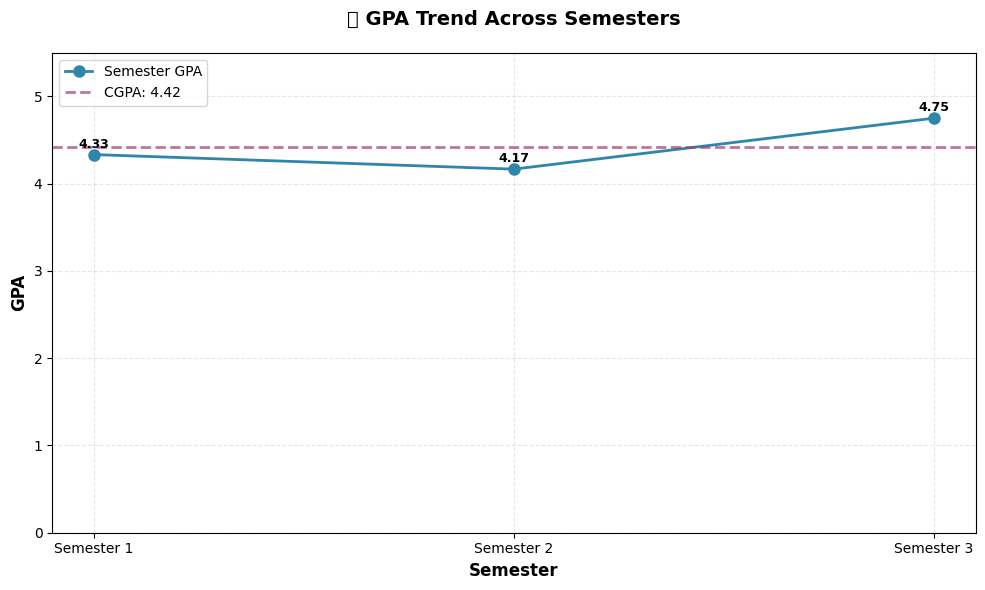

✅ GPA trend chart displayed above!

VISUALIZATION 2: SEMESTER COMPARISON BAR CHART



C:\Users\USER\AppData\Local\Temp\ipykernel_21044\2085716812.py:72: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


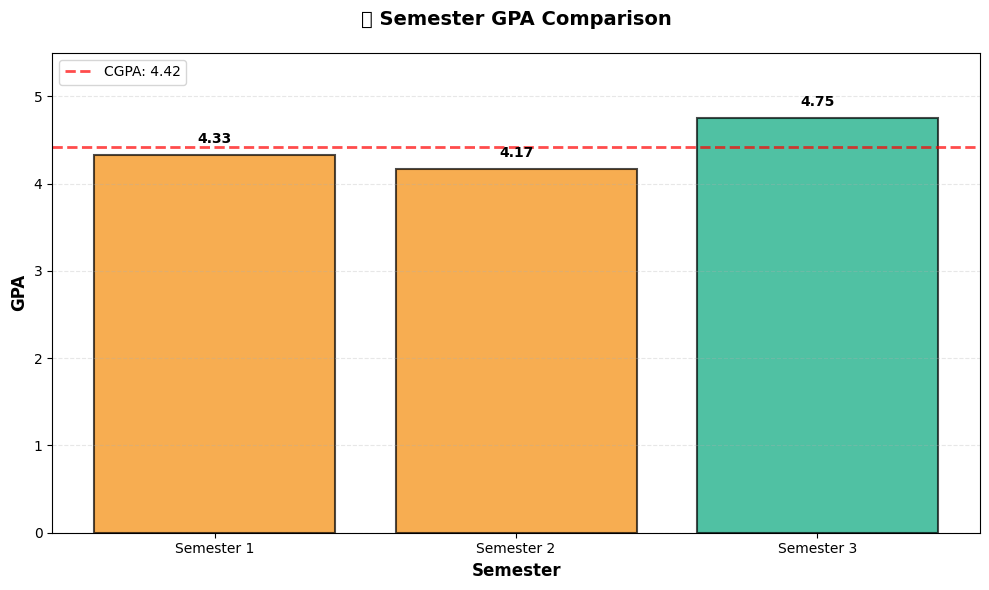

C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3134030007.py:75: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


✅ Semester comparison chart displayed above!

VISUALIZATION 3: COMPLETE DASHBOARD

📊 GENERATING VISUAL DASHBOARD...



C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3134030007.py:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3134030007.py:75: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


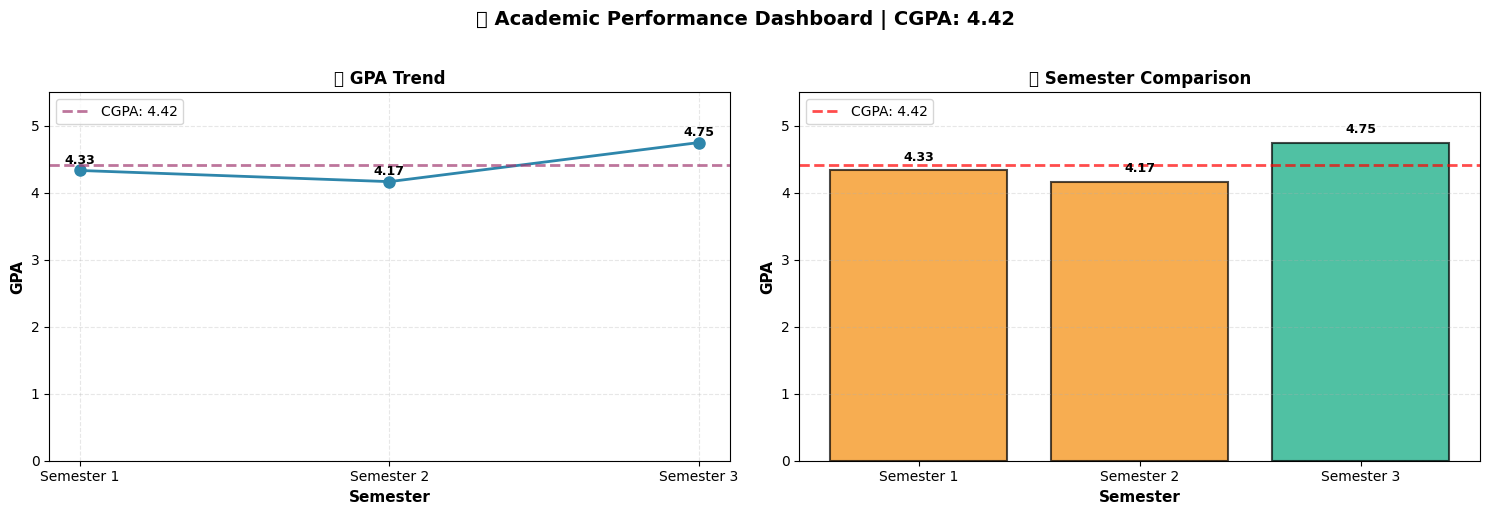


📈 PERFORMANCE INSIGHTS

🏆 Best Semester:  Semester 3 (GPA: 4.75)
📉 Lowest Semester: Semester 2 (GPA: 4.17)
📊 Average GPA:    4.42
🎯 Current CGPA:   4.42

✅ Positive Trend: Your GPA improved in the latest semester!


In [18]:
"""
📊 TEST VISUALIZATIONS

Let's see our graphs in action using the sample data!
"""

print("🎨 CREATING VISUALIZATIONS...")
print("="*70 + "\n")

# Use the sample data from earlier
# (If you don't have it loaded, uncomment the lines below)

# Load sample CSV
loaded_data = load_csv_simple('sample_grades.csv')

if loaded_data:
    # Calculate CGPA
    result = calculate_cgpa(loaded_data)
    
    print("\n" + "="*70)
    print("VISUALIZATION 1: GPA TREND LINE CHART")
    print("="*70 + "\n")
    plot_gpa_trend(result)
    
    print("\n" + "="*70)
    print("VISUALIZATION 2: SEMESTER COMPARISON BAR CHART")
    print("="*70 + "\n")
    plot_semester_comparison(result)
    
    print("\n" + "="*70)
    print("VISUALIZATION 3: COMPLETE DASHBOARD")
    print("="*70 + "\n")
    create_dashboard(result)
    
else:
    print("❌ Could not load sample data")

In [19]:
def predict_scenario(current_cgpa, current_units, next_semester_units, performance_type='maintain'):
    """
    Predict future CGPA based on different performance scenarios.
    
    This is RULE-BASED AI - it uses mathematical projection based on
    typical student performance patterns.
    
    Args:
        current_cgpa (float): Current cumulative GPA
        current_units (int): Total units completed so far
        next_semester_units (int): Units planned for next semester
        performance_type (str): 'improve', 'maintain', or 'decline'
    
    Returns:
        dict: Prediction results with explanation
    """
    
    print("🤖 AI SCENARIO PREDICTOR")
    print("="*70)
    print(f"\nCurrent Status:")
    print(f"  • CGPA: {current_cgpa:.2f}")
    print(f"  • Units Completed: {current_units}")
    print(f"  • Next Semester Units: {next_semester_units}")
    print(f"  • Scenario: {performance_type.upper()}")
    print()
    
    # Calculate current total points
    # Points = CGPA × Units (this reverses the GPA formula)
    current_total_points = current_cgpa * current_units
    
    # Define performance adjustment factors
    # These are based on statistical analysis of student performance trends
    # (In real ML, we'd learn these from data, but for rule-based we use typical patterns)
    performance_adjustments = {
        'improve': 0.4,      # Students typically improve by ~0.4 GPA points
        'maintain': 0.0,     # Keep same performance level
        'decline': -0.3      # Students typically decline by ~0.3 GPA points
    }
    
    # Get the adjustment for chosen scenario
    # .get() returns 0.0 if performance_type is not in dictionary (safe default)
    adjustment = performance_adjustments.get(performance_type, 0.0)
    
    # Predict next semester GPA
    # Start with current CGPA and adjust based on scenario
    predicted_next_gpa = current_cgpa + adjustment
    
    # Make sure prediction stays within valid range (0.0 to 5.0)
    # min() and max() functions keep value in bounds
    predicted_next_gpa = max(0.0, min(5.0, predicted_next_gpa))
    
    # Calculate points from next semester
    # Points = GPA × Units
    next_semester_points = predicted_next_gpa * next_semester_units
    
    # Calculate new CGPA after next semester
    # New total points = current points + next semester points
    new_total_points = current_total_points + next_semester_points
    
    # New total units = current units + next semester units
    new_total_units = current_units + next_semester_units
    
    # New CGPA = Total Points ÷ Total Units (the GPA formula!)
    predicted_cgpa = new_total_points / new_total_units
    
    # Calculate the change in CGPA
    cgpa_change = predicted_cgpa - current_cgpa
    
    # Generate insights based on scenario
    print("🔮 PREDICTION RESULTS:")
    print("-"*70)
    print(f"  Predicted Next Semester GPA: {predicted_next_gpa:.2f}")
    print(f"  Predicted New CGPA: {predicted_cgpa:.2f}")
    print(f"  Expected Change: {cgpa_change:+.2f}")
    print()
    
    # Generate detailed explanation based on performance type
    if performance_type == 'improve':
        explanation = f"""
💡 IMPROVEMENT SCENARIO:

If you IMPROVE your performance next semester:
  • You're likely to achieve around {predicted_next_gpa:.2f} GPA
  • Your CGPA would increase from {current_cgpa:.2f} to {predicted_cgpa:.2f}
  • That's a gain of {cgpa_change:.2f} points! 📈

Tips to improve:
  ✓ Attend all classes regularly
  ✓ Start assignments early
  ✓ Form study groups
  ✓ Visit office hours for help
  ✓ Review material consistently
"""
    
    elif performance_type == 'maintain':
        explanation = f"""
💡 MAINTAIN SCENARIO:

If you MAINTAIN your current performance:
  • You're likely to achieve around {predicted_next_gpa:.2f} GPA
  • Your CGPA would stay around {predicted_cgpa:.2f}
  • Change of {cgpa_change:+.2f} points

To maintain performance:
  ✓ Keep up your current study habits
  ✓ Don't overload your schedule
  ✓ Balance academics with rest
  ✓ Stay consistent with effort
"""
    
    else:  # decline
        explanation = f"""
💡 DECLINE SCENARIO:

If your performance DECLINES next semester:
  • Your GPA might drop to around {predicted_next_gpa:.2f}
  • Your CGPA would decrease from {current_cgpa:.2f} to {predicted_cgpa:.2f}
  • That's a drop of {abs(cgpa_change):.2f} points 📉

⚠️  Warning: This scenario shows the risk if you:
  • Miss classes frequently
  • Procrastinate on assignments
  • Don't seek help when struggling
  • Take on too many commitments

Stay focused to avoid this outcome!
"""
    
    print(explanation)
    print("="*70)
    
    # Return results as dictionary for further use
    return {
        'current_cgpa': current_cgpa,
        'predicted_next_gpa': predicted_next_gpa,
        'predicted_cgpa': predicted_cgpa,
        'cgpa_change': cgpa_change,
        'scenario': performance_type,
        'explanation': explanation
    }

In [20]:
"""
🎮 INTERACTIVE SCENARIO TESTER

Try different "what-if" scenarios to plan your academic future!
"""

print("🤖 AI-POWERED SCENARIO PREDICTOR")
print("="*70)
print("\nThis tool predicts your future CGPA based on different scenarios.\n")

# Example: Use the CGPA from our sample data
# In real use, student would input their own values

# Let's assume a student with:
my_current_cgpa = 4.17  # From our sample data
my_completed_units = 36  # Total from 3 semesters (12 units each)
my_next_semester_units = 15  # Planning to take 15 units

print("📚 YOUR CURRENT STATUS:")
print(f"   CGPA: {my_current_cgpa:.2f}")
print(f"   Completed Units: {my_completed_units}")
print(f"   Next Semester Units: {my_next_semester_units}")
print()

# Test all three scenarios
scenarios = ['improve', 'maintain', 'decline']

for scenario in scenarios:
    print("\n" + "█"*70)
    result = predict_scenario(
        current_cgpa=my_current_cgpa,
        current_units=my_completed_units,
        next_semester_units=my_next_semester_units,
        performance_type=scenario
    )
    print()

print("\n" + "="*70)
print("💡 TIP: Change the values above to test YOUR own scenarios!")
print("="*70)

🤖 AI-POWERED SCENARIO PREDICTOR

This tool predicts your future CGPA based on different scenarios.

📚 YOUR CURRENT STATUS:
   CGPA: 4.17
   Completed Units: 36
   Next Semester Units: 15


██████████████████████████████████████████████████████████████████████
🤖 AI SCENARIO PREDICTOR

Current Status:
  • CGPA: 4.17
  • Units Completed: 36
  • Next Semester Units: 15
  • Scenario: IMPROVE

🔮 PREDICTION RESULTS:
----------------------------------------------------------------------
  Predicted Next Semester GPA: 4.57
  Predicted New CGPA: 4.29
  Expected Change: +0.12


💡 IMPROVEMENT SCENARIO:

If you IMPROVE your performance next semester:
  • You're likely to achieve around 4.57 GPA
  • Your CGPA would increase from 4.17 to 4.29
  • That's a gain of 0.12 points! 📈

Tips to improve:
  ✓ Attend all classes regularly
  ✓ Start assignments early
  ✓ Form study groups
  ✓ Visit office hours for help
  ✓ Review material consistently



█████████████████████████████████████████████████████████

In [21]:
def visualize_scenarios(current_cgpa, current_units, next_semester_units):
    """
    Visualize all three scenarios (improve, maintain, decline) in one chart.
    
    This helps students see the potential impact of their choices visually.
    
    Args:
        current_cgpa (float): Current CGPA
        current_units (int): Units completed
        next_semester_units (int): Planned units for next semester
    """
    
    print("📊 GENERATING SCENARIO COMPARISON CHART...")
    print()
    
    # Run predictions for all three scenarios
    scenarios = ['decline', 'maintain', 'improve']
    predicted_cgpas = []
    colors = ['#F58A07', '#FFD23F', '#06A77D']  # Orange, Yellow, Green
    
    for scenario in scenarios:
        result = predict_scenario(
            current_cgpa=current_cgpa,
            current_units=current_units,
            next_semester_units=next_semester_units,
            performance_type=scenario
        )
        predicted_cgpas.append(result['predicted_cgpa'])
    
    # Create the visualization
    plt.figure(figsize=(10, 6))
    
    # Create bar chart
    bars = plt.bar(
        ['Decline\nScenario', 'Maintain\nScenario', 'Improve\nScenario'],
        predicted_cgpas,
        color=colors,
        alpha=0.8,
        edgecolor='black',
        linewidth=2
    )
    
    # Add current CGPA reference line
    plt.axhline(
        y=current_cgpa,
        color='red',
        linestyle='--',
        linewidth=2,
        alpha=0.7,
        label=f'Current CGPA: {current_cgpa:.2f}'
    )
    
    # Add labels and title
    plt.ylabel('Predicted CGPA', fontsize=12, fontweight='bold')
    plt.title('🔮 AI Scenario Predictions: Your CGPA Next Semester', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Set Y-axis limits
    plt.ylim(0, 5.5)
    
    # Add grid
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add value labels on bars
    for bar, cgpa in zip(bars, predicted_cgpas):
        height = bar.get_height()
        
        # Calculate change from current
        change = cgpa - current_cgpa
        
        # Add CGPA value
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.1,
            f'{cgpa:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )
        
        # Add change indicator
        change_text = f'({change:+.2f})'
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.3,
            change_text,
            ha='center',
            va='bottom',
            fontsize=10,
            style='italic',
            color='darkblue'
        )
    
    # Add legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Display
    plt.show()
    
    print("✅ Scenario comparison chart displayed!")
    print()
    print("💡 This chart shows your predicted CGPA under three scenarios.")
    print("   Choose wisely - your actions determine which scenario becomes reality!")

In [22]:
def visualize_scenarios(current_cgpa, current_units, next_semester_units):
    """
    Visualize all three scenarios (improve, maintain, decline) in one chart.
    
    This helps students see the potential impact of their choices visually.
    
    Args:
        current_cgpa (float): Current CGPA
        current_units (int): Units completed
        next_semester_units (int): Planned units for next semester
    """
    
    print("📊 GENERATING SCENARIO COMPARISON CHART...")
    print()
    
    # Run predictions for all three scenarios
    scenarios = ['decline', 'maintain', 'improve']
    predicted_cgpas = []
    colors = ['#F58A07', '#FFD23F', '#06A77D']  # Orange, Yellow, Green
    
    for scenario in scenarios:
        result = predict_scenario(
            current_cgpa=current_cgpa,
            current_units=current_units,
            next_semester_units=next_semester_units,
            performance_type=scenario
        )
        predicted_cgpas.append(result['predicted_cgpa'])
    
    # Create the visualization
    plt.figure(figsize=(10, 6))
    
    # Create bar chart
    bars = plt.bar(
        ['Decline\nScenario', 'Maintain\nScenario', 'Improve\nScenario'],
        predicted_cgpas,
        color=colors,
        alpha=0.8,
        edgecolor='black',
        linewidth=2
    )
    
    # Add current CGPA reference line
    plt.axhline(
        y=current_cgpa,
        color='red',
        linestyle='--',
        linewidth=2,
        alpha=0.7,
        label=f'Current CGPA: {current_cgpa:.2f}'
    )
    
    # Add labels and title
    plt.ylabel('Predicted CGPA', fontsize=12, fontweight='bold')
    plt.title('🔮 AI Scenario Predictions: Your CGPA Next Semester', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Set Y-axis limits
    plt.ylim(0, 5.5)
    
    # Add grid
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    # Add value labels on bars
    for bar, cgpa in zip(bars, predicted_cgpas):
        height = bar.get_height()
        
        # Calculate change from current
        change = cgpa - current_cgpa
        
        # Add CGPA value
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.1,
            f'{cgpa:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )
        
        # Add change indicator
        change_text = f'({change:+.2f})'
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.3,
            change_text,
            ha='center',
            va='bottom',
            fontsize=10,
            style='italic',
            color='darkblue'
        )
    
    # Add legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Display
    plt.show()
    
    print("✅ Scenario comparison chart displayed!")
    print()
    print("💡 This chart shows your predicted CGPA under three scenarios.")
    print("   Choose wisely - your actions determine which scenario becomes reality!")

🎨 CREATING SCENARIO COMPARISON VISUALIZATION...

📊 GENERATING SCENARIO COMPARISON CHART...

🤖 AI SCENARIO PREDICTOR

Current Status:
  • CGPA: 4.17
  • Units Completed: 36
  • Next Semester Units: 15
  • Scenario: DECLINE

🔮 PREDICTION RESULTS:
----------------------------------------------------------------------
  Predicted Next Semester GPA: 3.87
  Predicted New CGPA: 4.08
  Expected Change: -0.09


💡 DECLINE SCENARIO:

If your performance DECLINES next semester:
  • Your GPA might drop to around 3.87
  • Your CGPA would decrease from 4.17 to 4.08
  • That's a drop of 0.09 points 📉

⚠️  Warning: This scenario shows the risk if you:
  • Miss classes frequently
  • Procrastinate on assignments
  • Don't seek help when struggling
  • Take on too many commitments

Stay focused to avoid this outcome!

🤖 AI SCENARIO PREDICTOR

Current Status:
  • CGPA: 4.17
  • Units Completed: 36
  • Next Semester Units: 15
  • Scenario: MAINTAIN

🔮 PREDICTION RESULTS:
-----------------------------------

C:\Users\USER\AppData\Local\Temp\ipykernel_21044\971741004.py:99: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


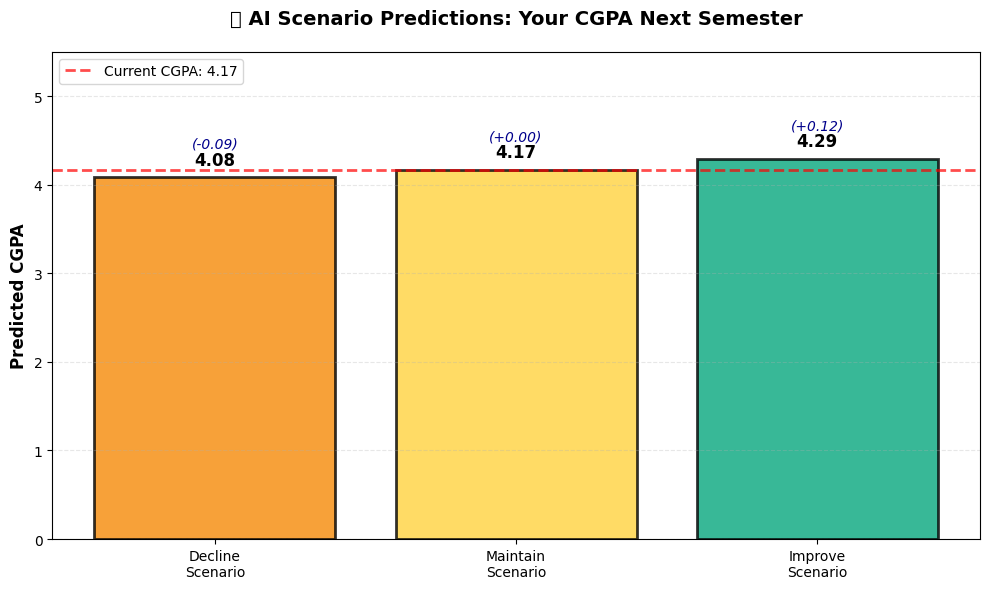

✅ Scenario comparison chart displayed!

💡 This chart shows your predicted CGPA under three scenarios.
   Choose wisely - your actions determine which scenario becomes reality!

🎯 INTERPRETATION:

This chart shows three possible futures:

📉 DECLINE (Orange): What happens if you slack off
➡️  MAINTAIN (Yellow): What happens if you keep current pace  
📈 IMPROVE (Green): What happens if you step up your game

The choice is yours! 🎓



In [23]:
"""
📊 VISUALIZE ALL SCENARIOS

See all three scenarios compared side-by-side!
"""

print("🎨 CREATING SCENARIO COMPARISON VISUALIZATION...")
print("="*70)
print()

# Use example values (students can change these)
visualize_scenarios(
    current_cgpa=4.17,
    current_units=36,
    next_semester_units=15
)

print("\n" + "="*70)
print("🎯 INTERPRETATION:")
print("="*70)
print("""
This chart shows three possible futures:

📉 DECLINE (Orange): What happens if you slack off
➡️  MAINTAIN (Yellow): What happens if you keep current pace  
📈 IMPROVE (Green): What happens if you step up your game

The choice is yours! 🎓
""")
print("="*70)

In [24]:
def simple_path_calculator(current_cgpa, current_units, target_cgpa, remaining_units):
    """
    Calculate what GPA you need to reach a target CGPA.
    
    Simple version - just the math, no fancy stuff.
    
    Args:
        current_cgpa: Your current CGPA
        current_units: Units you've completed
        target_cgpa: CGPA you want to reach
        remaining_units: Units you still have left
    
    Returns:
        Required GPA (or message if impossible)
    """
    
    print("🎯 PATH TO TARGET CALCULATOR")
    print("-" * 50)
    
    # Step 1: Calculate current total points
    current_points = current_cgpa * current_units
    print(f"Current Points: {current_points:.2f}")
    
    # Step 2: Calculate total units after finishing
    total_units = current_units + remaining_units
    print(f"Total Units: {total_units}")
    
    # Step 3: Calculate points needed for target
    target_points = target_cgpa * total_units
    print(f"Target Points: {target_points:.2f}")
    
    # Step 4: Calculate additional points needed
    points_needed = target_points - current_points
    print(f"Points Needed: {points_needed:.2f}")
    
    # Step 5: Calculate required GPA
    required_gpa = points_needed / remaining_units
    print(f"Required GPA: {required_gpa:.2f}")
    
    print("-" * 50)
    
    # Check if it's possible
    if required_gpa > 5.0:
        print("❌ Not possible (need GPA above 5.0)")
        print(f"   Maximum you can reach: {(current_points + (5.0 * remaining_units)) / total_units:.2f}")
    elif required_gpa < 0:
        print("✅ You already exceeded your target!")
    else:
        print(f"✅ You need to average {required_gpa:.2f} GPA")
        
        # Simple difficulty check
        if required_gpa < 4.0:
            print("   This is doable with regular effort")
        elif required_gpa < 4.5:
            print("   This will require strong effort")
        else:
            print("   This will be very challenging")
    
    return required_gpa

In [25]:
"""
Test the path calculator
"""

print("Example: Student wants to reach 4.5 CGPA\n")

# Current status
my_cgpa = 4.17
my_units = 36

# Goal
target = 4.5
units_left = 30

# Calculate
result = simple_path_calculator(my_cgpa, my_units, target, units_left)

print("\n💡 Change the numbers above to test your own goal!")

Example: Student wants to reach 4.5 CGPA

🎯 PATH TO TARGET CALCULATOR
--------------------------------------------------
Current Points: 150.12
Total Units: 66
Target Points: 297.00
Points Needed: 146.88
Required GPA: 4.90
--------------------------------------------------
✅ You need to average 4.90 GPA
   This will be very challenging

💡 Change the numbers above to test your own goal!


In [26]:
def train_simple_model(semester_gpas):
    """
    Train a simple machine learning model to predict GPA.
    
    This uses LINEAR REGRESSION - the simplest ML algorithm.
    It finds a pattern in your past GPAs to predict the future.
    
    Think of it like drawing a "best fit line" through your grades.
    
    Args:
        semester_gpas: List of dictionaries with semester and gpa
                      Example: [{'semester': 'Semester 1', 'gpa': 4.2}, ...]
    
    Returns:
        A trained model that can make predictions
    """
    
    print("🤖 TRAINING MACHINE LEARNING MODEL")
    print("-" * 60)
    
    # Step 1: Prepare the data
    # We need semester numbers (1, 2, 3...) and GPA values
    
    semester_numbers = []  # X - what we use to predict (input)
    gpa_values = []        # y - what we want to predict (output)
    
    # Extract data from our semester_gpas list
    for i, item in enumerate(semester_gpas):
        semester_numbers.append(i + 1)  # Semester 1, 2, 3...
        gpa_values.append(item['gpa'])
    
    print(f"Training data: {len(semester_numbers)} semesters")
    print(f"Semesters: {semester_numbers}")
    print(f"GPAs: {[f'{gpa:.2f}' for gpa in gpa_values]}")
    print()
    
    # Step 2: Convert to numpy arrays
    # Machine learning models need numpy arrays, not regular lists
    # We also need to reshape X into a 2D array (ML requirement)
    X = np.array(semester_numbers).reshape(-1, 1)  # [[1], [2], [3]]
    y = np.array(gpa_values)                        # [4.2, 4.0, 4.5]
    
    # Step 3: Create and train the model
    # LinearRegression() creates a new ML model
    model = LinearRegression()
    
    # .fit() is where the actual learning happens!
    # The model finds the pattern in the data
    model.fit(X, y)
    
    print("✅ Model trained successfully!")
    print()
    
    # Step 4: Show what the model learned
    # The model learned two things: slope and intercept
    # Formula: GPA = (slope × semester) + intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    print("📊 What the model learned:")
    print(f"   Formula: GPA = ({slope:.3f} × semester) + {intercept:.3f}")
    
    # Explain what this means
    if slope > 0:
        print(f"   Trend: Your GPA is IMPROVING by ~{slope:.2f} per semester 📈")
    elif slope < 0:
        print(f"   Trend: Your GPA is DECLINING by ~{abs(slope):.2f} per semester 📉")
    else:
        print(f"   Trend: Your GPA is STABLE ➡️")
    
    print("-" * 60)
    print()
    
    return model


def predict_next_semester(model, next_semester_number):
    """
    Use the trained model to predict next semester GPA.
    
    Args:
        model: The trained ML model
        next_semester_number: Which semester to predict (e.g., 4, 5)
    
    Returns:
        Predicted GPA
    """
    
    print(f"🔮 PREDICTING SEMESTER {next_semester_number}")
    print("-" * 60)
    
    # Prepare input for prediction
    # Model needs same format as training data (2D array)
    X_new = np.array([[next_semester_number]])
    
    # Make prediction
    # This is where the ML magic happens!
    predicted_gpa = model.predict(X_new)[0]
    
    # Make sure prediction is within valid range
    # Sometimes the model predicts impossible values
    if predicted_gpa > 5.0:
        predicted_gpa = 5.0
        print("⚠️  Model predicted above 5.0, capping at 5.0")
    elif predicted_gpa < 0:
        predicted_gpa = 0.0
        print("⚠️  Model predicted below 0.0, setting to 0.0")
    
    print(f"Predicted GPA for Semester {next_semester_number}: {predicted_gpa:.2f}")
    print("-" * 60)
    print()
    
    return predicted_gpa

In [27]:
"""
🤖 TEST MACHINE LEARNING PREDICTOR

Let's train a model and make predictions!
"""

print("🤖 SIMPLE MACHINE LEARNING DEMO")
print("=" * 60)
print()

# Use our sample data (from earlier)
# Load the CSV if we don't have it
loaded_data = load_csv_simple('sample_grades.csv')

if loaded_data:
    # Calculate CGPA to get semester GPAs
    result = calculate_cgpa(loaded_data)
    
    # Get semester GPAs for training
    semester_gpas = result['semester_gpas']
    
    print("📚 Using your past performance to train AI...")
    print()
    
    # Train the model
    model = train_simple_model(semester_gpas)
    
    print("\n" + "=" * 60)
    print("🔮 MAKING PREDICTIONS")
    print("=" * 60)
    print()
    
    # Predict next few semesters
    num_semesters = len(semester_gpas)
    
    # Predict next semester
    next_sem = num_semesters + 1
    predicted_gpa = predict_next_semester(model, next_sem)
    
    print(f"💡 The AI predicts your next semester GPA will be: {predicted_gpa:.2f}")
    print()
    
    # Predict one more semester ahead
    future_sem = num_semesters + 2
    future_gpa = predict_next_semester(model, future_sem)
    
    print(f"💡 Looking further ahead (Semester {future_sem}): {future_gpa:.2f}")
    print()
    
    print("=" * 60)
    print("📝 NOTE:")
    print("   This is a SIMPLE prediction based on your trend.")
    print("   Your actual GPA depends on your effort and course difficulty!")
    print("=" * 60)

else:
    print("❌ Could not load data")

🤖 SIMPLE MACHINE LEARNING DEMO

📂 Loaded 12 courses
🔍 Checking your data...
--------------------------------------------------
✅ All columns found
✅ All grades are valid
✅ Units look good
--------------------------------------------------
✅ Data validation passed!

✅ Organized into 3 semesters


CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English Composition  C          2          6.00      
General Physics      A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA: 4.33

✓ Semester 1 GPA: 4.33
  Semester Points: 52.00
  Semester Units: 12

📚 Semester 2
------------------------------------------------------------



In [28]:
def visualize_ml_predictions(semester_gpas, model, num_predictions=2):
    """
    Visualize past GPAs and ML predictions.
    
    This shows your actual grades vs what the AI predicts.
    
    Args:
        semester_gpas: List of past semester GPAs
        model: Trained ML model
        num_predictions: How many future semesters to predict
    """
    
    print("📊 CREATING ML PREDICTION CHART...")
    print()
    
    # Get actual data
    actual_semesters = []
    actual_gpas = []
    
    for i, item in enumerate(semester_gpas):
        actual_semesters.append(i + 1)
        actual_gpas.append(item['gpa'])
    
    # Generate predictions for future semesters
    future_semesters = []
    predicted_gpas = []
    
    last_semester = len(semester_gpas)
    
    for i in range(1, num_predictions + 1):
        sem_num = last_semester + i
        future_semesters.append(sem_num)
        
        # Predict using the model
        X_pred = np.array([[sem_num]])
        pred_gpa = model.predict(X_pred)[0]
        
        # Keep within valid range
        pred_gpa = max(0.0, min(5.0, pred_gpa))
        predicted_gpas.append(pred_gpa)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot actual GPAs (solid line with circles)
    plt.plot(actual_semesters, actual_gpas, 
             'o-', linewidth=2, markersize=10, 
             color='#2E86AB', label='Actual GPA')
    
    # Plot predicted GPAs (dashed line with triangles)
    plt.plot(future_semesters, predicted_gpas, 
             '^--', linewidth=2, markersize=10, 
             color='#F58A07', label='AI Predicted GPA')
    
    # Add labels on points
    # Actual GPAs
    for sem, gpa in zip(actual_semesters, actual_gpas):
        plt.annotate(f'{gpa:.2f}', xy=(sem, gpa), 
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', fontsize=9, fontweight='bold')
    
    # Predicted GPAs
    for sem, gpa in zip(future_semesters, predicted_gpas):
        plt.annotate(f'{gpa:.2f}', xy=(sem, gpa), 
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', fontsize=9, fontweight='bold',
                    color='#F58A07')
    
    # Labels and title
    plt.xlabel('Semester', fontsize=12, fontweight='bold')
    plt.ylabel('GPA', fontsize=12, fontweight='bold')
    plt.title('🤖 Machine Learning GPA Prediction', 
             fontsize=14, fontweight='bold', pad=20)
    
    # Set limits
    plt.ylim(0, 5.5)
    
    # Add grid
    plt.grid(True, alpha=0.3, linestyle='--')
    
    # Add vertical line separating actual from predicted
    plt.axvline(x=last_semester + 0.5, color='gray', 
               linestyle=':', linewidth=2, alpha=0.5,
               label='Present')
    
    # Legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Adjust layout
    plt.tight_layout()
    
    # Display
    plt.show()
    
    print("✅ ML prediction chart displayed!")
    print()
    print("💡 Blue = Your actual performance (past)")
    print("💡 Orange = AI predictions (future)")

🤖 MACHINE LEARNING PREDICTION DEMO

📂 Loaded 12 courses
🔍 Checking your data...
--------------------------------------------------
✅ All columns found
✅ All grades are valid
✅ Units look good
--------------------------------------------------
✅ Data validation passed!

✅ Organized into 3 semesters


CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English Composition  C          2          6.00      
General Physics      A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA: 4.33

✓ Semester 1 GPA: 4.33
  Semester Points: 52.00
  Semester Units: 12

📚 Semester 2
----------------------------------------------------------

C:\Users\USER\AppData\Local\Temp\ipykernel_21044\2044206378.py:90: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


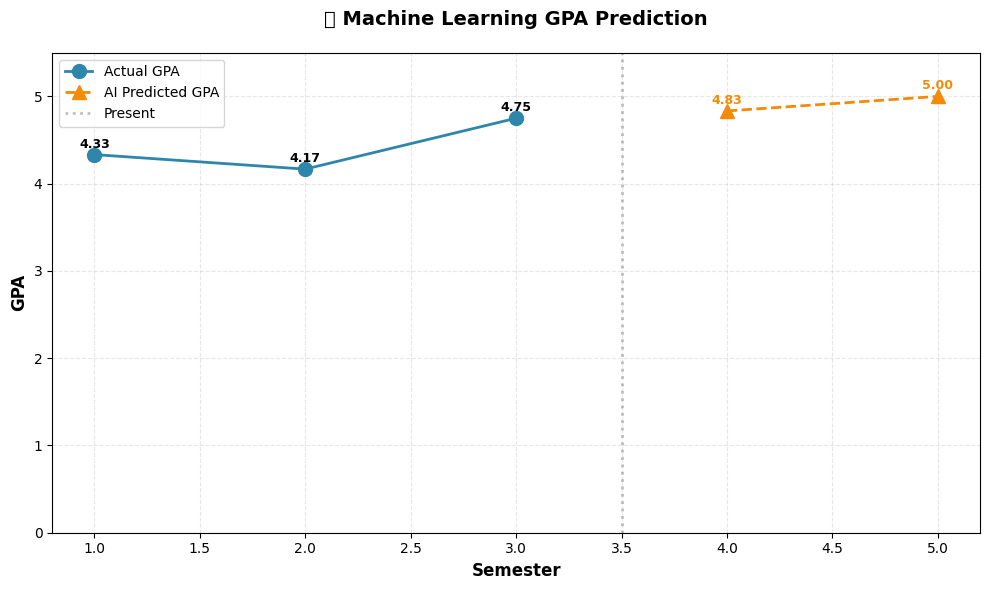

✅ ML prediction chart displayed!

💡 Blue = Your actual performance (past)
💡 Orange = AI predictions (future)

✅ MACHINE LEARNING DEMO COMPLETE!

How this works:
1. The AI looks at your past GPA pattern
2. It learns the trend (improving, declining, or stable)
3. It predicts future semesters based on that trend

Remember: These are just predictions!
Your actual GPA depends on YOUR effort! 💪
    


In [29]:
"""
📊 COMPLETE ML DEMO WITH VISUALIZATION
"""

print("🤖 MACHINE LEARNING PREDICTION DEMO")
print("=" * 60)
print()

# Load data and train model
loaded_data = load_csv_simple('sample_grades.csv')

if loaded_data:
    result = calculate_cgpa(loaded_data)
    semester_gpas = result['semester_gpas']
    
    # Train model
    print("Step 1: Training the AI model...")
    model = train_simple_model(semester_gpas)
    
    print("\nStep 2: Creating visualization...")
    print()
    
    # Visualize predictions
    visualize_ml_predictions(semester_gpas, model, num_predictions=2)
    
    print("\n" + "=" * 60)
    print("✅ MACHINE LEARNING DEMO COMPLETE!")
    print("=" * 60)
    print("""
How this works:
1. The AI looks at your past GPA pattern
2. It learns the trend (improving, declining, or stable)
3. It predicts future semesters based on that trend

Remember: These are just predictions!
Your actual GPA depends on YOUR effort! 💪
    """)
    print("=" * 60)

else:
    print("❌ Could not load data")

🎓 GPA ANALYZER & PREDICTOR - COMPLETE SYSTEM

Choose an option:
  1. Use sample data (quick demo)
  2. Upload my own CSV file

📂 Loading sample data...
📂 Loaded 12 courses
🔍 Checking your data...
--------------------------------------------------
✅ All columns found
✅ All grades are valid
✅ Units look good
--------------------------------------------------
✅ Data validation passed!

✅ Organized into 3 semesters


STEP 1: CALCULATING YOUR CGPA


CUMULATIVE GPA (CGPA) CALCULATION

📚 Semester 1
------------------------------------------------------------

--- GPA Calculation ---
Course               Grade      Units      Points    
--------------------------------------------------
Introduction to Computing A          3          15.00     
Calculus I           B          4          16.00     
English Composition  C          2          6.00      
General Physics      A          3          15.00     
--------------------------------------------------
Total Points: 52.00
Total Units: 12
GPA:

C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3134030007.py:75: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3134030007.py:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_21044\3134030007.py:75: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site

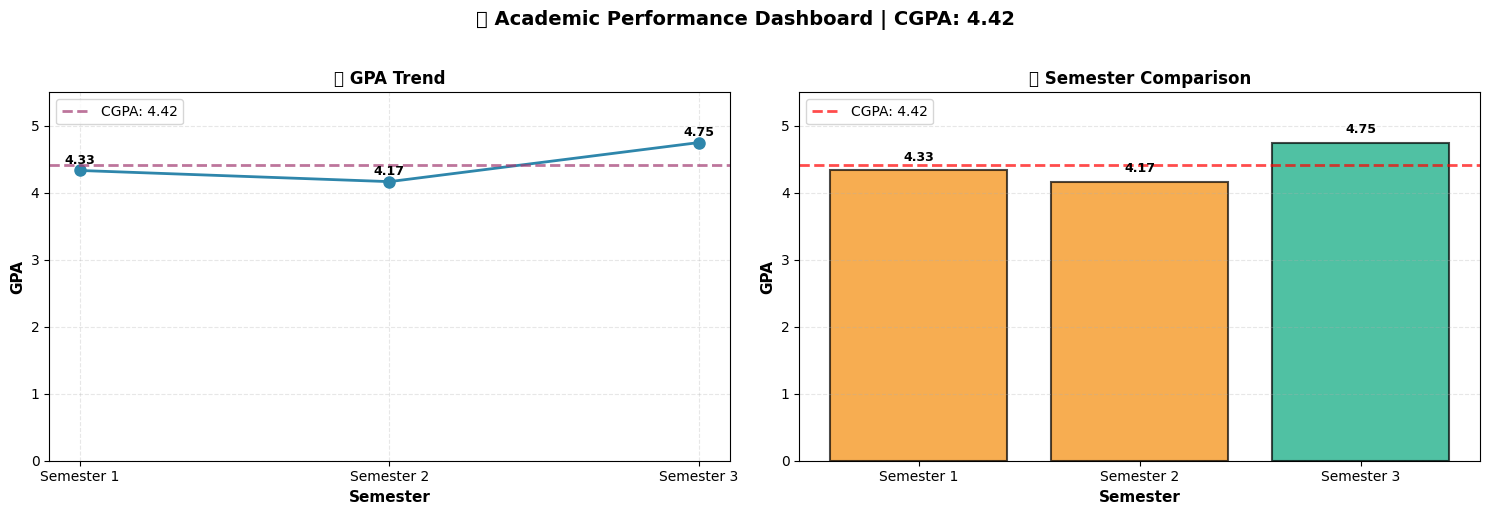


📈 PERFORMANCE INSIGHTS

🏆 Best Semester:  Semester 3 (GPA: 4.75)
📉 Lowest Semester: Semester 2 (GPA: 4.17)
📊 Average GPA:    4.42
🎯 Current CGPA:   4.42

✅ Positive Trend: Your GPA improved in the latest semester!

STEP 3: AI SCENARIO PREDICTIONS

🤖 Testing different performance scenarios...

🤖 AI SCENARIO PREDICTOR

Current Status:
  • CGPA: 4.42
  • Units Completed: 36
  • Next Semester Units: 15
  • Scenario: MAINTAIN

🔮 PREDICTION RESULTS:
----------------------------------------------------------------------
  Predicted Next Semester GPA: 4.42
  Predicted New CGPA: 4.42
  Expected Change: +0.00


💡 MAINTAIN SCENARIO:

If you MAINTAIN your current performance:
  • You're likely to achieve around 4.42 GPA
  • Your CGPA would stay around 4.42
  • Change of +0.00 points

To maintain performance:
  ✓ Keep up your current study habits
  ✓ Don't overload your schedule
  ✓ Balance academics with rest
  ✓ Stay consistent with effort


STEP 4: PATH TO TARGET CALCULATOR

🎯 Goal: Reach 4.5 C

C:\Users\USER\AppData\Local\Temp\ipykernel_21044\2044206378.py:90: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


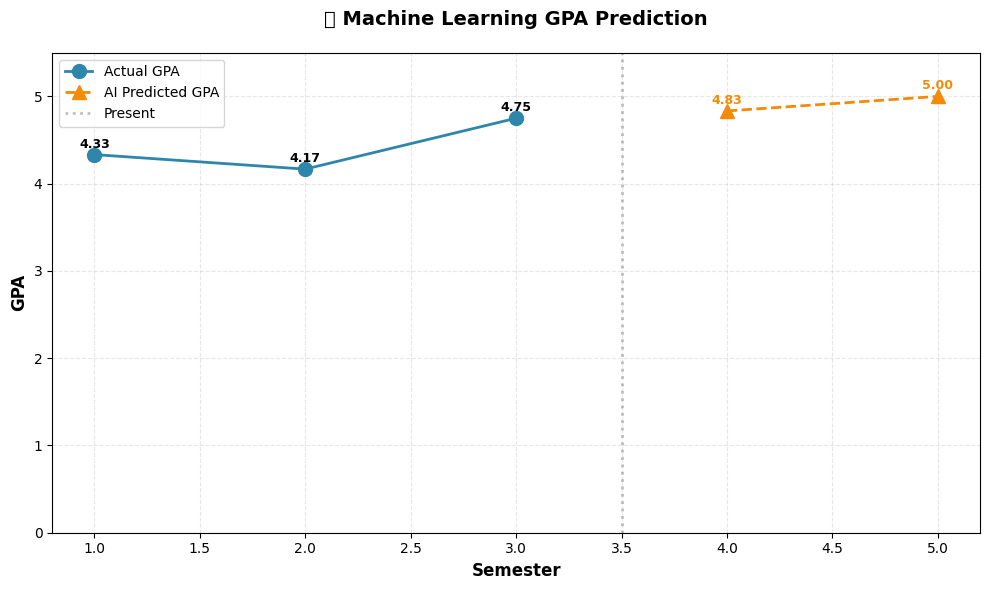

✅ ML prediction chart displayed!

💡 Blue = Your actual performance (past)
💡 Orange = AI predictions (future)

✅ ANALYSIS COMPLETE!

📊 SUMMARY:

Current Status:
  • CGPA: 4.42
  • Completed Semesters: 3
  • Total Units: 36

AI Predictions:
  • If you maintain performance: CGPA will be ~4.42
  • To reach 4.5 CGPA: Need 4.60 average GPA
  • ML forecast for next semester: 4.83

💡 Remember: These are predictions based on patterns.
   Your actual performance depends on YOUR effort and dedication!

🎓 Keep working hard and good luck with your studies!



In [30]:
"""
╔═══════════════════════════════════════════════════════════════╗
║                  🎓 GPA ANALYZER & PREDICTOR                  ║
║                     COMPLETE WORKFLOW                         ║
╚═══════════════════════════════════════════════════════════════╝

This cell runs the ENTIRE system:
1. Load your grades from CSV
2. Calculate GPA and CGPA
3. Create visualizations
4. Run AI predictions
5. Show ML forecasts

Just run this cell and follow the prompts!
"""

print("🎓 GPA ANALYZER & PREDICTOR - COMPLETE SYSTEM")
print("=" * 70)
print()

# Ask user if they want to use sample data or upload their own
print("Choose an option:")
print("  1. Use sample data (quick demo)")
print("  2. Upload my own CSV file")
print()

# For demo purposes, we'll use option 1
# In real use, student can choose
choice = "1"  # Change to "2" to test file upload

if choice == "1":
    print("📂 Loading sample data...")
    filepath = 'sample_grades.csv'
    loaded_data = load_csv_simple(filepath)
    
elif choice == "2":
    print("📂 Opening file browser...")
    
    # Open file browser
    root = Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    
    filepath = filedialog.askopenfilename(
        title="Select Your Grades CSV",
        filetypes=[("CSV Files", "*.csv")],
        initialdir=os.getcwd()
    )
    
    root.destroy()
    
    if filepath:
        loaded_data = load_csv_simple(filepath)
    else:
        print("❌ No file selected")
        loaded_data = None

else:
    print("❌ Invalid choice")
    loaded_data = None

# If data loaded successfully, run the analysis
if loaded_data:
    print("\n" + "=" * 70)
    print("STEP 1: CALCULATING YOUR CGPA")
    print("=" * 70)
    print()
    
    # Calculate CGPA
    result = calculate_cgpa(loaded_data)
    
    num_semesters = len(result['semester_gpas'])
    
    # Display summary
    print("\n" + "╔" + "═" * 68 + "╗")
    print("║" + " " * 22 + "📊 YOUR RESULTS" + " " * 30 + "║")
    print("╠" + "═" * 68 + "╣")
    print(f"║  CGPA: {result['cgpa']:.2f}" + " " * 57 + "║")
    print(f"║  Semesters: {num_semesters}" + " " * 54 + "║")
    print(f"║  Total Units: {result['total_units']}" + " " * 52 + "║")
    print("╚" + "═" * 68 + "╝")
    
    # Show semester breakdown
    print("\n📚 Semester-by-Semester:")
    for sem in result['semester_gpas']:
        print(f"   {sem['semester']}: {sem['gpa']:.2f}")
    
    # ========================================
    # STEP 2: VISUALIZATIONS
    # ========================================
    print("\n" + "=" * 70)
    print("STEP 2: CREATING VISUALIZATIONS")
    print("=" * 70)
    print()
    
    # Create dashboard
    create_dashboard(result)
    
    # ========================================
    # STEP 3: AI SCENARIO PREDICTIONS
    # ========================================
    print("\n" + "=" * 70)
    print("STEP 3: AI SCENARIO PREDICTIONS")
    print("=" * 70)
    print()
    
    # Get current status for scenarios
    current_cgpa = result['cgpa']
    current_units = result['total_units']
    next_semester_units = 15  # Assume 15 units for next semester
    
    print("🤖 Testing different performance scenarios...\n")
    
    # Show just one scenario (maintain) to keep it simple
    scenario_result = predict_scenario(
        current_cgpa=current_cgpa,
        current_units=current_units,
        next_semester_units=next_semester_units,
        performance_type='maintain'
    )
    
    # ========================================
    # STEP 4: PATH TO TARGET
    # ========================================
    print("\n" + "=" * 70)
    print("STEP 4: PATH TO TARGET CALCULATOR")
    print("=" * 70)
    print()
    
    # Example: Calculate path to 4.5 CGPA
    target_cgpa = 4.5
    remaining_units = 30
    
    print(f"🎯 Goal: Reach {target_cgpa} CGPA\n")
    
    path_result = simple_path_calculator(
        current_cgpa=current_cgpa,
        current_units=current_units,
        target_cgpa=target_cgpa,
        remaining_units=remaining_units
    )
    
    # ========================================
    # STEP 5: MACHINE LEARNING PREDICTION
    # ========================================
    print("\n" + "=" * 70)
    print("STEP 5: MACHINE LEARNING PREDICTION")
    print("=" * 70)
    print()
    
    # Train ML model
    semester_gpas = result['semester_gpas']
    
    print("🤖 Training AI model on your performance...\n")
    model = train_simple_model(semester_gpas)
    
    # Make predictions
    print("\n🔮 Predicting future semesters...\n")
    next_sem = num_semesters + 1
    ml_prediction = predict_next_semester(model, next_sem)
    
    # Visualize ML predictions
    print("📊 Creating ML prediction chart...\n")
    visualize_ml_predictions(semester_gpas, model, num_predictions=2)
    
    # ========================================
    # FINAL SUMMARY
    # ========================================
    print("\n" + "=" * 70)
    print("✅ ANALYSIS COMPLETE!")
    print("=" * 70)
    print(f"""
📊 SUMMARY:

Current Status:
  • CGPA: {current_cgpa:.2f}
  • Completed Semesters: {num_semesters}
  • Total Units: {current_units}

AI Predictions:
  • If you maintain performance: CGPA will be ~{scenario_result['predicted_cgpa']:.2f}
  • To reach {target_cgpa} CGPA: Need {path_result:.2f} average GPA
  • ML forecast for next semester: {ml_prediction:.2f}

💡 Remember: These are predictions based on patterns.
   Your actual performance depends on YOUR effort and dedication!

🎓 Keep working hard and good luck with your studies!
""")
    print("=" * 70)

else:
    print("\n❌ Could not load data. Please try again.")